### If you are using Google Colab, please run the following cell:

In [ ]:
!git clone https://github.com/davemlz/foss4g24eu-asi.git
!pip install -r foss4g24eu-asi/requirements.txt

# 1. Awesome Spectral Indices (ASI) Python Mastey
### Duration: 30 min
---

This notebook is divided as follows:

- Part 1. Exploring and querying indices.
- Part 2. Computing indices.

## Introduction to `spyndex`

<img src="https://raw.githubusercontent.com/davemlz/spyndex/main/docs/_static/spyndex.png" alt="spyndex" width="500"/>

`spyndex` ([Montero et al., 2023](https://doi.org/10.1038/s41597-023-02096-0)) is the official ASI Python API. It stores a local copy of the ASI Catalogue, but it can also retrieve it in an online mode. Furthermore, it supports the computation of indices in the catalog for any kind of data type that supports overloaded operators, such as: `numeric`, `numpy`, `dataframes`, etc.



<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41597-023-02096-0/MediaObjects/41597_2023_2096_Fig2_HTML.png?as=webp" alt="spyndex" width="700"/>



# Part 1. Exploring and Querying Indices

## Importing `spyndex`

Let's import our main package!

In [67]:
import spyndex

## The indices

We can access all indices available in the ASI catalogue using the `indices` attribute!

In [12]:
spyndex.indices

SpectralIndices(['AFRI1600', 'AFRI2100', 'ANDWI', 'ARI', 'ARI2', 'ARVI', 'ATSAVI', 'AVI', 'AWEInsh', 'AWEIsh', 'BAI', 'BAIM', 'BAIS2', 'BCC', 'BI', 'BITM', 'BIXS', 'BLFEI', 'BNDVI', 'BRBA', 'BWDRVI', 'BaI', 'CCI', 'CIG', 'CIRE', 'CSI', 'CSIT', 'CVI', 'DBI', 'DBSI', 'DPDD', 'DSI', 'DSWI1', 'DSWI2', 'DSWI3', 'DSWI4', 'DSWI5', 'DVI', 'DVIplus', 'DpRVIHH', 'DpRVIVV', 'EBBI', 'EBI', 'EMBI', 'ENDVI', 'EVI', 'EVI2', 'EVIv', 'ExG', 'ExGR', 'ExR', 'FAI', 'FCVI', 'GARI', 'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GM1', 'GM2', 'GNDVI', 'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI', 'IBI', 'IKAW', 'IPVI', 'IRECI', 'LSWI', 'MBI', 'MBWI', 'MCARI', 'MCARI1', 'MCARI2', 'MCARI705', 'MCARIOSAVI', 'MCARIOSAVI705', 'MGRVI', 'MIRBI', 'MLSWI26', 'MLSWI27', 'MNDVI', 'MNDWI', 'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MSR705', 'MTCI', 'MTVI1', 'MTVI2', 'MuWIR', 'NBAI', 'NBLI', 'NBLIOLI', 'NBR', 'NBR2', 'NBRSWIR', 'NBRT1', 'NBRT2', 'NBRT3', 'NBRplus', 'NBSIMS', 'NBUI', 'ND705', 'NDBI', 'NDBaI', 'NDCI', 'NDDI

We can also visualize them as a dictionary.

In [13]:
# spyndex.indices.to_dict()

Indices can be accessed using dot notation or using `spyndex.indices["NDVI"]`

In [14]:
spyndex.indices.NDVI

SpectralIndex(NDVI: Normalized Difference Vegetation Index)
        * Application Domain: vegetation
        * Bands/Parameters: ['N', 'R']
        * Formula: (N-R)/(N+R)
        * Reference: https://ntrs.nasa.gov/citations/19740022614
        

For each index you can access to all the attributes described in the catalogue!

In [15]:
spyndex.indices.NDVI.long_name

'Normalized Difference Vegetation Index'

In [16]:
spyndex.indices.NDVI.application_domain

'vegetation'

In [17]:
spyndex.indices.NDVI.formula

'(N-R)/(N+R)'

In [18]:
spyndex.indices.NDVI.bands

['N', 'R']

In [19]:
spyndex.indices.NDVI.platforms

['Sentinel-2',
 'Landsat-OLI',
 'Landsat-TM',
 'Landsat-ETM+',
 'MODIS',
 'Planet-Fusion']

In [20]:
spyndex.indices.NDVI.reference

'https://ntrs.nasa.gov/citations/19740022614'

## The bands

The standard bands can be accessed via the `bands` attribute:

In [21]:
spyndex.bands

Bands(['A', 'B', 'G', 'G1', 'N', 'N2', 'R', 'RE1', 'RE2', 'RE3', 'S1', 'S2', 'T', 'T1', 'T2', 'WV', 'Y'])

You can also visualize them as a dictionary.

In [22]:
# spyndex.bands.to_dict()

Just as with indices, bands are accessed using dot notation.

In [23]:
spyndex.bands.N

Band(N: Near-Infrared (NIR))
        

And all attributes of the band can also be accessed in the same way!

In [24]:
spyndex.bands.N.long_name

'Near-Infrared (NIR)'

In [25]:
spyndex.bands.N.max_wavelength

900

In [26]:
spyndex.bands.N.min_wavelength

760

Furthermore, the description of the specific band for popular satellite platforms can be retrieved. This is an example for Landsat-9 OLI. 

In [27]:
spyndex.bands.N.landsat9

PlatformBand(Platform: Landsat 9, Band: Near-Infrared (NIR))
        * Band: B5
        * Center Wavelength (nm): 865.0
        * Bandwidth (nm): 30.0
        

This one is an example for Sentinel-2A MSI.

In [28]:
spyndex.bands.N.sentinel2a

PlatformBand(Platform: Sentinel-2A, Band: Near-Infrared (NIR))
        * Band: B8
        * Center Wavelength (nm): 832.8
        * Bandwidth (nm): 106.0
        

And you can access its attributes too!

In [29]:
spyndex.bands.N.sentinel2a.band

'B8'

In [30]:
spyndex.bands.N.sentinel2a.wavelength

832.8

In [31]:
spyndex.bands.N.sentinel2a.bandwidth

106.0

## The constants

Constants (or additional parameters) can be accessed via the `constants` attribute.

In [32]:
spyndex.constants

Constants(['C1', 'C2', 'L', 'PAR', 'alpha', 'beta', 'c', 'cexp', 'epsilon', 'fdelta', 'g', 'gamma', 'k', 'lambdaG', 'lambdaN', 'lambdaR', 'lambdaS1', 'nexp', 'omega', 'p', 'sigma', 'sla', 'slb'])

You can also visualize them as a dictionary:

In [33]:
# spyndex.constants.to_dict()

Constants can be accessed via dot notation.

In [34]:
spyndex.constants.L

Constant(L: Canopy background adjustment)
        * Default value: 1.0
        

And also their attributes!

In [35]:
spyndex.constants.L.description

'Canopy background adjustment'

In [36]:
spyndex.constants.L.default

1.0

## Querying indices

Querying indices is easy given the ASI attributes defined by index.

### Querying by Application Domain

For instance, let's get all indices that are included in the "vegetation" application domain:

In [37]:
vegetation_indices = [idx for idx, attrs in spyndex.indices.items() if attrs.application_domain == "vegetation"]
vegetation_indices

['AFRI1600',
 'AFRI2100',
 'ARI',
 'ARI2',
 'ARVI',
 'ATSAVI',
 'AVI',
 'BCC',
 'BNDVI',
 'BWDRVI',
 'CCI',
 'CIG',
 'CIRE',
 'CVI',
 'DSI',
 'DSWI1',
 'DSWI2',
 'DSWI3',
 'DSWI4',
 'DSWI5',
 'DVI',
 'DVIplus',
 'EBI',
 'ENDVI',
 'EVI',
 'EVI2',
 'EVIv',
 'ExG',
 'ExGR',
 'ExR',
 'FCVI',
 'GARI',
 'GBNDVI',
 'GCC',
 'GDVI',
 'GEMI',
 'GLI',
 'GM1',
 'GM2',
 'GNDVI',
 'GOSAVI',
 'GRNDVI',
 'GRVI',
 'GSAVI',
 'GVMI',
 'IAVI',
 'IKAW',
 'IPVI',
 'IRECI',
 'MCARI',
 'MCARI1',
 'MCARI2',
 'MCARI705',
 'MCARIOSAVI',
 'MCARIOSAVI705',
 'MGRVI',
 'MNDVI',
 'MNLI',
 'MRBVI',
 'MSAVI',
 'MSI',
 'MSR',
 'MSR705',
 'MTCI',
 'MTVI1',
 'MTVI2',
 'ND705',
 'NDDI',
 'NDGI',
 'NDII',
 'NDMI',
 'NDPI',
 'NDREI',
 'NDVI',
 'NDVI705',
 'NDYI',
 'NGRDI',
 'NIRv',
 'NIRvH2',
 'NIRvP',
 'NLI',
 'NMDI',
 'NRFIg',
 'NRFIr',
 'NormG',
 'NormNIR',
 'NormR',
 'OCVI',
 'OSAVI',
 'PSRI',
 'RCC',
 'RDVI',
 'REDSI',
 'RENDVI',
 'RGBVI',
 'RGRI',
 'RI',
 'RVI',
 'S2REP',
 'SARVI',
 'SAVI',
 'SAVI2',
 'SEVI',
 'SI',
 '

### Querying by satellite platform

Or let's get all indices that can be computed with Sentinel-2 bands:

In [38]:
s2_indices = [idx for idx, attrs in spyndex.indices.items() if "Sentinel-2" in attrs.platforms]
s2_indices

['AFRI1600',
 'AFRI2100',
 'ANDWI',
 'ARI',
 'ARI2',
 'ARVI',
 'ATSAVI',
 'AVI',
 'AWEInsh',
 'AWEIsh',
 'BAI',
 'BAIM',
 'BAIS2',
 'BCC',
 'BI',
 'BITM',
 'BIXS',
 'BLFEI',
 'BNDVI',
 'BRBA',
 'BWDRVI',
 'BaI',
 'CIG',
 'CIRE',
 'CSI',
 'CVI',
 'DBSI',
 'DSI',
 'DSWI1',
 'DSWI2',
 'DSWI3',
 'DSWI4',
 'DSWI5',
 'DVI',
 'DVIplus',
 'EBI',
 'EMBI',
 'ENDVI',
 'EVI',
 'EVI2',
 'EVIv',
 'ExG',
 'ExGR',
 'ExR',
 'FAI',
 'FCVI',
 'GARI',
 'GBNDVI',
 'GCC',
 'GDVI',
 'GEMI',
 'GLI',
 'GM1',
 'GM2',
 'GNDVI',
 'GOSAVI',
 'GRNDVI',
 'GRVI',
 'GSAVI',
 'GVMI',
 'IAVI',
 'IBI',
 'IKAW',
 'IPVI',
 'IRECI',
 'LSWI',
 'MBI',
 'MBWI',
 'MCARI',
 'MCARI1',
 'MCARI2',
 'MCARI705',
 'MCARIOSAVI',
 'MCARIOSAVI705',
 'MGRVI',
 'MIRBI',
 'MLSWI26',
 'MLSWI27',
 'MNDVI',
 'MNDWI',
 'MNLI',
 'MRBVI',
 'MSAVI',
 'MSI',
 'MSR',
 'MSR705',
 'MTCI',
 'MTVI1',
 'MTVI2',
 'MuWIR',
 'NBAI',
 'NBR',
 'NBR2',
 'NBRSWIR',
 'NBRplus',
 'NBSIMS',
 'ND705',
 'NDBI',
 'NDCI',
 'NDDI',
 'NDGI',
 'NDGlaI',
 'NDII',
 'NDMI',

### Querying by bands

Or if you have constrained inputs, you can also define what bands you have. Let's get all indices that are computable having just RGB:

In [39]:
import numpy as np

In [40]:
RGB_indices = [idx for idx, attrs in spyndex.indices.items() if np.all(np.isin(attrs.bands,["R","G","B"]))]
RGB_indices

['BCC',
 'BITM',
 'BIXS',
 'DSWI4',
 'ExG',
 'ExGR',
 'ExR',
 'GCC',
 'GLI',
 'IKAW',
 'MGRVI',
 'MRBVI',
 'NDGlaI',
 'NDTI',
 'NDYI',
 'NGRDI',
 'OSI',
 'RCC',
 'RGBVI',
 'RGRI',
 'RI',
 'RI4XS',
 'SI',
 'TGI',
 'VARI',
 'VIG']

# Part 2. Computing Indices

The fun part of `spyndex` is that you can use it for computing indices!

## Computing indices from the indices list

Look how easy is to compute the NDVI for a given pair of values using the `compute` method of each index:

In [41]:
spyndex.indices.NDVI.compute(N = 0.65,R = 0.12)

0.6883116883116883

## Computing indices using `computeIndex`

Getting inside the index can be a lot of work, so you can use the `computeIndex` method.

In [42]:
spyndex.computeIndex(
    index = "NDVI",
    params = dict(
        N = 0.65,
        R = 0.12
    )
)

0.6883116883116883

And instead of using a dictionary of parameters for the `params` argument, you can pass them as keyword arguments:

In [43]:
spyndex.computeIndex(
    index = "NDVI",
    N = 0.65,
    R = 0.12
)

0.6883116883116883

In [44]:
spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI"],
    N = 0.65,
    R = 0.12
)

[0.6883116883116883, 0.4474025974025974, 0.53]

## Computing multiple indices at once

And the best thing comes here: 

You can compute multiple indices at once!

Note that you don't need to define your band parameters more than once ;)

In [45]:
spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI","SAVI"],
    N = 0.65,
    R = 0.12,
    L = 0.5
)

[0.6883116883116883, 0.4474025974025974, 0.53, 0.6259842519685039]

In the case of the constant values, you can also use the default values of the constants:

In [46]:
spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI","SAVI"],
    N = 0.65,
    R = 0.12,
    L = spyndex.constants.L.default
)

[0.6883116883116883, 0.4474025974025974, 0.53, 0.5988700564971752]

## Computing indices with `numpy`

And this is fully compatible with `numpy` arrays:

In [47]:
spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI","SAVI"],
    N = np.random.normal(0.6,0.10,10),
    R = np.random.normal(0.1,0.10,10),
    L = 0.5
)

array([[0.59940128, 0.6102466 , 0.37310382, 0.90816168, 0.81075977,
        0.66550112, 0.92376128, 1.11113266, 0.43220149, 0.83346602],
       [0.40548456, 0.4184819 , 0.21494877, 0.54790599, 0.51927425,
        0.47759002, 0.56142646, 0.63608358, 0.26482261, 0.44291342],
       [0.50704544, 0.51977368, 0.31308452, 0.57427627, 0.57354296,
        0.57350909, 0.5836758 , 0.60259935, 0.36981195, 0.4831433 ],
       [0.56509172, 0.57678134, 0.35069409, 0.76073141, 0.71252636,
        0.63172449, 0.77352654, 0.86719175, 0.40919051, 0.67123146]])

## Computing indices with `xarray`

Let's try an example with some real data. This is a Sentinel-2 subset image with VIS-NIR data. It is available as a dataset of `spyndex`. Note that this dataset is a `xarray.DataArray` object!

In [48]:
snt = spyndex.datasets.open("sentinel")
snt = snt/10000
snt

<xarray.DataArray (band: 4, x: 300, y: 300)> Size: 3MB
array([[[0.0299, 0.0276, 0.028 , ..., 0.051 , 0.0516, 0.0521],
        [0.0287, 0.0285, 0.0284, ..., 0.0503, 0.0476, 0.0469],
        [0.0287, 0.0292, 0.0288, ..., 0.0454, 0.0411, 0.0337],
        ...,
        [0.0502, 0.0508, 0.052 , ..., 0.0683, 0.067 , 0.0791],
        [0.0486, 0.0518, 0.0532, ..., 0.0688, 0.0696, 0.0693],
        [0.0486, 0.0506, 0.0515, ..., 0.0659, 0.0671, 0.0664]],

       [[0.0469, 0.0446, 0.0466, ..., 0.0695, 0.0711, 0.0728],
        [0.0469, 0.0437, 0.0469, ..., 0.0683, 0.0694, 0.0666],
        [0.046 , 0.046 , 0.046 , ..., 0.0628, 0.0595, 0.0527],
        ...,
        [0.0804, 0.0808, 0.0832, ..., 0.092 , 0.0872, 0.1023],
        [0.0787, 0.0803, 0.0822, ..., 0.089 , 0.0882, 0.0871],
        [0.0787, 0.0799, 0.0822, ..., 0.0893, 0.0832, 0.0834]],

       [[0.0319, 0.0293, 0.0328, ..., 0.1054, 0.109 , 0.111 ],
        [0.0327, 0.0318, 0.0345, ..., 0.1044, 0.1004, 0.0952],
        [0.0339, 0.0355, 0.0323, ..., 0.0922, 0.0784, 0.0652],
        ...,
        [0.1528, 0.1516, 0.1516, ..., 0.125 , 0.1246, 0.142 ],
        [0.147 , 0.1502, 0.1498, ..., 0.1316, 0.12  , 0.1162],
        [0.1394, 0.148 , 0.1472, ..., 0.1288, 0.1144, 0.1122]],

       [[0.2164, 0.2128, 0.2206, ..., 0.1796, 0.1837, 0.1816],
        [0.211 , 0.2017, 0.2228, ..., 0.1795, 0.1839, 0.1788],
        [0.205 , 0.2112, 0.2062, ..., 0.1816, 0.1789, 0.1864],
        ...,
        [0.191 , 0.1942, 0.1942, ..., 0.2105, 0.1898, 0.2102],
        [0.1836, 0.1874, 0.1916, ..., 0.2075, 0.1792, 0.1747],
        [0.1778, 0.1844, 0.187 , ..., 0.2087, 0.183 , 0.1675]]])
Coordinates:
  * band     (band) <U3 48B 'B02' 'B03' 'B04' 'B08'
Dimensions without coordinates: x, y

Let's visualize what we have there.

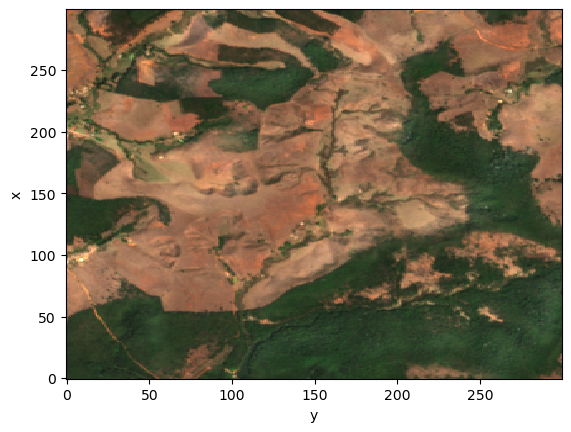

In [49]:
(snt.sel(band = ["B04","B03","B02"])/0.2).clip(0,1).plot.imshow()

And now look how we can easily compute spectral indices for this image:

In [50]:
idx_snt = spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI","SAVI"],
    N = snt.sel(band = "B08"),
    R = snt.sel(band = "B04"),
    L = 0.5
)

Let's visualize them:

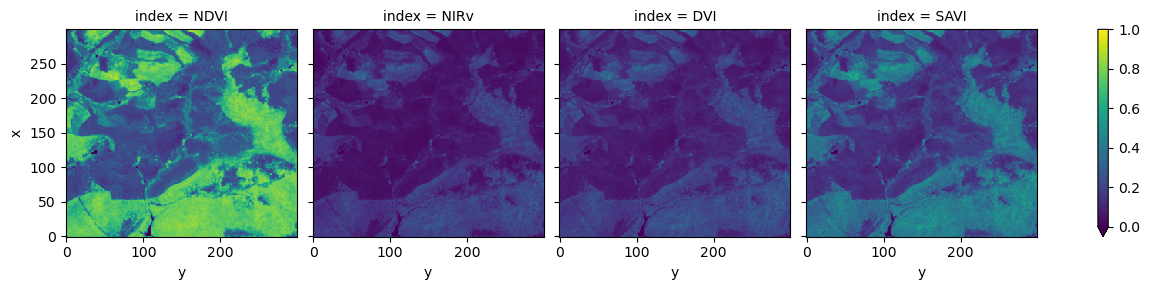

In [51]:
idx_snt.plot.imshow(col="index",col_wrap = 4,vmin = 0,vmax = 1)

## Computing indices with `pandas`

Note that `spyndex` also works with `pandas` data frames. Let's use some Landsat data for this. This dataset is available in `spyndex`:

In [52]:
df = spyndex.datasets.open("spectral")
df

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class
0,0.089850,0.100795,0.132227,0.165764,0.269054,0.306206,0.251949,297.328396,Urban
1,0.073859,0.086990,0.124404,0.160979,0.281264,0.267596,0.217917,297.107934,Urban
2,0.072938,0.086028,0.120994,0.140203,0.284220,0.258384,0.200098,297.436064,Urban
3,0.087733,0.103916,0.135981,0.163976,0.254479,0.259580,0.216735,297.203638,Urban
4,0.090593,0.109306,0.150350,0.181260,0.269535,0.273234,0.219554,297.097680,Urban
...,...,...,...,...,...,...,...,...,...
115,0.018048,0.021540,0.040927,0.034438,0.287822,0.113253,0.053742,289.624179,Vegetation
116,0.015325,0.019203,0.044750,0.029900,0.281608,0.101510,0.048325,289.108058,Vegetation
117,0.014830,0.018460,0.035785,0.026242,0.239615,0.088942,0.040845,288.974755,Vegetation
118,0.013620,0.017497,0.032512,0.028030,0.167703,0.071013,0.033997,289.596835,Vegetation


And now look how easy is to compute spectral indices for a data frame!

In [53]:
idx_df = spyndex.computeIndex(
    index = ["NDVI","NIRv","DVI","SAVI"],
    N = df["SR_B5"],
    R = df["SR_B4"],
    L = 0.5
)
idx_df

,NDVI,NIRv,DVI,SAVI
0,0.237548,0.063913,0.103290,0.165738
1,0.271989,0.076501,0.120285,0.191487
2,0.339326,0.096443,0.144017,0.233688
3,0.216278,0.055038,0.090502,0.147807
4,0.195821,0.052781,0.088275,0.139265
...,...,...,...,...
115,0.786275,0.226308,0.253385,0.462235
116,0.808030,0.227547,0.251708,0.465259
117,0.802582,0.192311,0.213372,0.417909
118,0.713589,0.119671,0.139673,0.301134


## Computing indices in parallel for multidimensional lazy arrays with `xarray` and `dask`

Now, let's work with some real-real-real data, let's use `cubo` ([Montero et al., 2024](https://doi.org/10.48550/arXiv.2404.13105)) to get a Sentinel-2 SR AI-focused Earth System Data Cube (ESDC) of Tartu:

In [54]:
import cubo

We have to define some simple parameters to get our AI-focused ESDC:

In [55]:
da = cubo.create(
    lat=58.37224, # Central latitude of the cube
    lon=26.72636, # Central longitude of the cube
    collection="sentinel-2-l2a", # Name of the STAC collection
    bands=["B04","B03","B02"], # Bands to retrieve
    start_date="2020-06-01", # Start date of the cube
    end_date="2020-07-01", # End date of the cube
    edge_size=512, # Edge size of the cube (px)
    resolution=30, # Pixel size of the cube (m)
    query={"eo:cloud_cover": {"lt": 20}}
)
da

/net/home/dmontero/.conda/envs/foss4g24_asi/lib/python3.12/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'sentinel-2-l2a' (time: 4, band: 3, y: 512, x: 512)> Size: 25MB
dask.array<fetch_raster_window, shape=(4, 3, 512, 512), dtype=float64, chunksize=(1, 1, 512, 512), chunktype=numpy.ndarray>
Coordinates: (12/47)
  * time                                     (time) datetime64[ns] 32B 2020-0...
    id                                       (time) <U54 864B 'S2A_MSIL2A_202...
  * band                                     (band) <U3 36B 'B04' 'B03' 'B02'
  * x                                        (x) float64 4kB 4.763e+05 ... 4....
  * y                                        (y) float64 4kB 6.478e+06 ... 6....
    s2:processing_baseline                   <U5 20B '02.12'
    ...                                       ...
    proj:transform                           object 8B {0.0, 6500040.0, 10.0,...
    common_name                              (band) <U5 60B 'red' 'green' 'blue'
    center_wavelength                        (band) float64 24B 0.665 0.56 0.49
    full_width_half_max                      (band) float64 24B 0.038 ... 0.098
    epsg                                     int64 8B 32635
    cubo:distance_from_center                (y, x) float64 2MB 1.087e+04 ......
Attributes:
    collection:           sentinel-2-l2a
    stac:                 https://planetarycomputer.microsoft.com/api/stac/v1
    epsg:                 32635
    resolution:           30
    edge_size:            512
    edge_size_m:          15360
    central_lat:          58.37224
    central_lon:          26.72636
    central_y:            6470186.555209706
    central_x:            483993.5792300114
    time_coverage_start:  2020-06-01
    time_coverage_end:    2020-07-01

Let's visualize it!

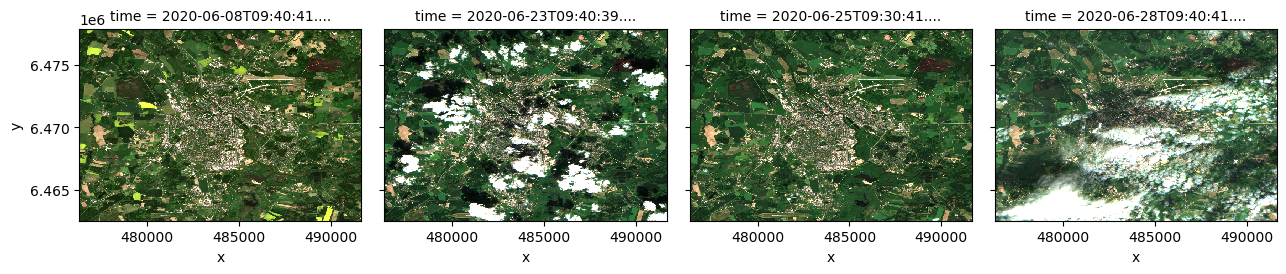

In [56]:
(da/2000).clip(0,1).plot.imshow(col="time",col_wrap = 4)

First, we need to scale the values:

In [57]:
da = da/10000

And then we can create the indices! Let's do all RGB indices!

Note that the indices are not computed since `cubo` resturns a lazy array:

In [58]:
da_idx = spyndex.computeIndex(
    index = RGB_indices,
    R = da.sel(band = "B04"),
    G = da.sel(band = "B03"),
    B = da.sel(band = "B02")
)
da_idx

<xarray.DataArray 'sentinel-2-l2a' (index: 26, time: 4, y: 512, x: 512)> Size: 218MB
dask.array<concatenate, shape=(26, 4, 512, 512), dtype=float64, chunksize=(1, 1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 32B 2020-06-08T09:40:41.024000 ... 2020-06...
  * x        (x) float64 4kB 4.763e+05 4.763e+05 ... 4.916e+05 4.916e+05
  * y        (y) float64 4kB 6.478e+06 6.478e+06 ... 6.463e+06 6.463e+06
  * index    (index) <U6 624B 'BCC' 'BITM' 'BIXS' 'DSWI4' ... 'TGI' 'VARI' 'VIG'

Here there are the results. Let's check the VARI:

In [64]:
spyndex.indices.VARI

SpectralIndex(VARI: Visible Atmospherically Resistant Index)
        * Application Domain: vegetation
        * Bands/Parameters: ['G', 'R', 'B']
        * Formula: (G-R)/(G+R-B)
        * Reference: https://doi.org/10.1016/S0034-4257(01)00289-9
        

And let's visualize it, this is computed in parallel and just the requested indices!

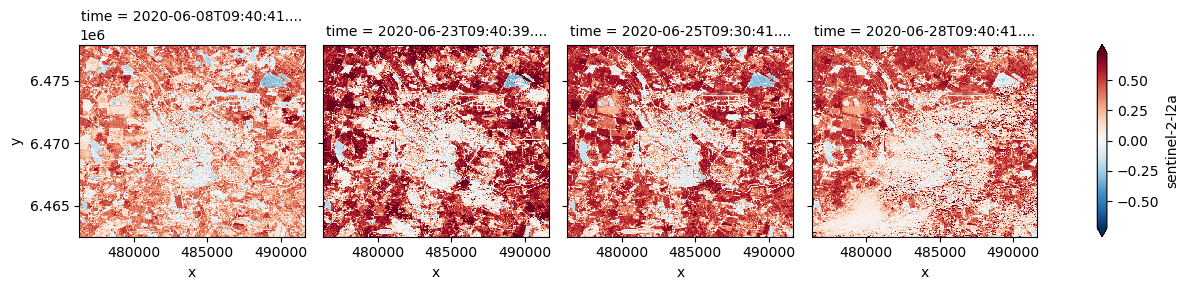

In [61]:
da_idx.sel(index = "VARI").plot.imshow(col="time",col_wrap = 4,robust = True)

Now let's check the ExG:

In [65]:
spyndex.indices.ExG

SpectralIndex(ExG: Excess Green Index)
        * Application Domain: vegetation
        * Bands/Parameters: ['G', 'R', 'B']
        * Formula: 2*G-R-B
        * Reference: https://doi.org/10.13031/2013.27838
        

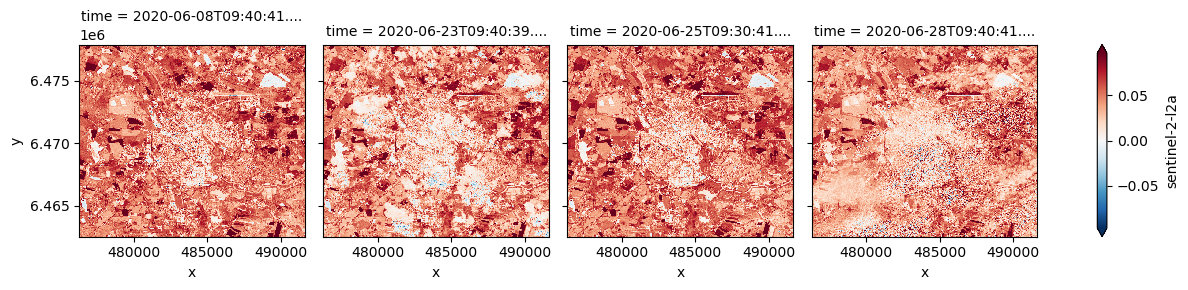

In [62]:
da_idx.sel(index = "ExG").plot.imshow(col="time",col_wrap = 4,robust = True)

And finally the GCC!

In [66]:
spyndex.indices.GCC

SpectralIndex(GCC: Green Chromatic Coordinate)
        * Application Domain: vegetation
        * Bands/Parameters: ['G', 'R', 'B']
        * Formula: G/(R+G+B)
        * Reference: https://doi.org/10.1016/0034-4257(87)90088-5
        

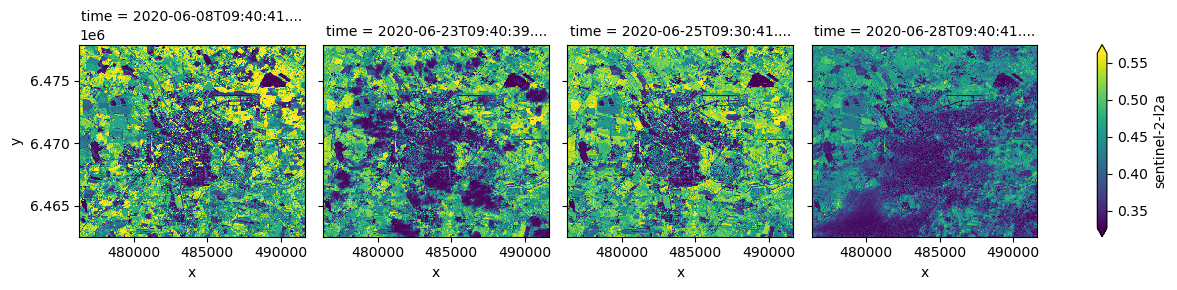

In [63]:
da_idx.sel(index = "GCC").plot.imshow(col="time",col_wrap = 4,robust = True)